In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA


In [10]:
# Replace with your actual data path
data_path = "/Users/ravishanker/Documents/GITHUB/DataScience/HW2"
data = pd.read_csv(os.path.join(data_path, "test_sample.csv"))

In [11]:
Y=data['Y']
X = data.drop('Y', axis=1)

In [12]:
X.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489
0,1.082067,-1.079835,-0.985430,-2.119171,-2.652029,-3.103508,1.003656,2.239233,0.882092,0.570970,...,-0.150049,-0.873711,0.273953,-1.611790,-2.831665,-2.354729,0.244141,0.322460,1.205441,-1.377972
1,-2.405342,0.355544,-5.471260,0.657273,-0.887649,2.193742,-4.430885,-2.651823,0.779437,-0.710488,...,0.746570,-0.587592,4.110534,-4.723051,0.718411,0.365596,-1.832665,0.914597,-2.386314,-0.875435
2,0.572114,2.157779,-0.095256,-1.700763,-1.196031,-1.356526,0.026605,-2.394240,-1.922446,-1.941038,...,0.564515,2.880229,-0.304721,1.945745,-1.316406,0.682704,5.839095,-0.630148,-2.216271,-1.994935
3,-1.856292,-2.097453,-1.525538,0.185800,2.568686,-1.587031,-1.932121,0.655735,-2.556912,-1.653328,...,1.555866,0.728848,0.759371,-1.324611,-1.820115,-0.090785,2.008616,1.105687,-2.076196,-0.215238
4,-1.662872,-2.104390,1.815639,2.070252,3.494588,1.953172,-2.254869,0.254393,-0.385991,0.839712,...,0.436023,0.142275,1.340802,2.044545,-0.809480,1.187208,1.551167,-2.737541,0.988071,-0.034741


In [13]:
prostateData_norm = X
prostateData_norm /= X.std()
prostateData_norm.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489
0,0.550278,-0.550261,-0.507203,-1.042560,-1.380259,-1.491468,0.515237,1.082693,0.440586,0.270756,...,-0.075040,-0.441104,0.134587,-0.813089,-1.461810,-1.188998,0.124487,0.160521,0.594729,-0.684577
1,-1.223220,0.181178,-2.816067,0.323356,-0.461980,1.054257,-2.274639,-1.282184,0.389312,-0.336916,...,0.373363,-0.296653,2.019408,-2.382608,0.370870,0.184604,-0.934471,0.455287,-1.177337,-0.434917
2,0.290945,1.099559,-0.049028,-0.836718,-0.622479,-0.651912,0.013658,-1.157640,-0.960221,-0.920446,...,0.282316,1.454120,-0.149702,0.981558,-0.679577,0.344725,2.977338,-0.313688,-1.093442,-0.991085
3,-0.944005,-1.068818,-0.785197,0.091407,1.336882,-0.762687,-0.991874,0.317055,-1.277123,-0.784013,...,0.778095,0.367968,0.373061,-0.668218,-0.939611,-0.045841,1.024188,0.550412,-1.024334,-0.106930
4,-0.845642,-1.072353,0.934513,1.018494,1.818772,0.938645,-1.157560,0.123002,-0.192794,0.398194,...,0.218057,0.071829,0.658704,1.031399,-0.417884,0.599470,0.790936,-1.362749,0.487485,-0.017259


In [14]:
print(prostateData_norm.iloc[:,:].std())


X0      1.0
X1      1.0
X2      1.0
X3      1.0
X4      1.0
       ... 
X485    1.0
X486    1.0
X487    1.0
X488    1.0
X489    1.0
Length: 490, dtype: float64


In [15]:
#Fitting the linear model

import statsmodels.api as sm

allPredictors_lm = sm.OLS(Y, sm.add_constant(X)).fit()
print(allPredictors_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.434e+05
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           2.11e-24
Time:                        00:41:30   Log-Likelihood:                 1536.2
No. Observations:                 500   AIC:                            -2090.
Df Residuals:                       9   BIC:                            -20.99
Df Model:                         490                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7248      0.025     28.565      0.0

In [8]:
print(allPredictors_lm.pvalues > 0.05)


const    False
X0       False
X1       False
X2       False
X3       False
         ...  
X485     False
X486     False
X487      True
X488     False
X489     False
Length: 491, dtype: bool


In [18]:
#Fit lasso regression model to train data using sklearn package.


lassoProstate = Lasso(alpha=0.1)
lassoProstate.fit(X, Y)

Lasso(alpha=0.1)

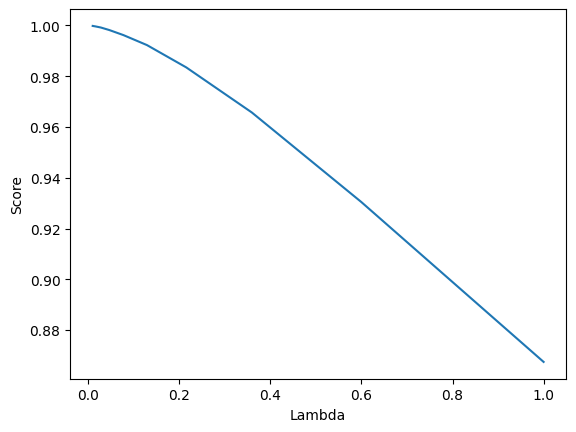

In [19]:
lambd_values = np.logspace(-2, 0, 10)

scores = []
for lambd in lambd_values:
    lasso = Lasso(alpha=lambd, fit_intercept=False)
    lasso.fit(X, Y)
    scores.append(lasso.score(X, Y))

plt.plot(lambd_values, scores)
plt.xlabel("Lambda")
plt.ylabel("Score");

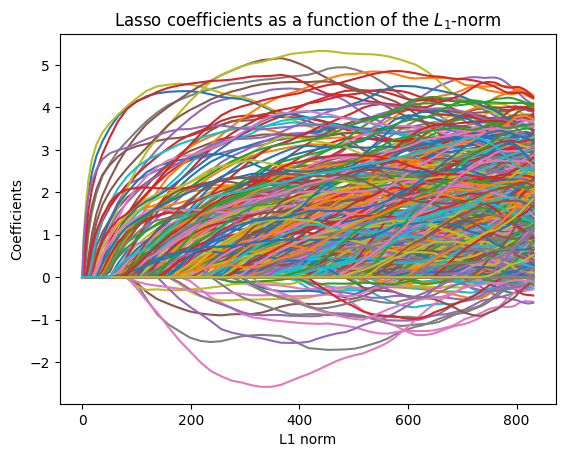

In [20]:
lambd_values = np.logspace(-2, 2, 100)

coefs = []
l1_norm = []
for lambd in lambd_values:
    lasso = Lasso(alpha=lambd, fit_intercept=False)
    lasso.fit(X, Y)
    coefs.append(lasso.coef_)
    l1_norm.append(np.sum(np.abs(lasso.coef_)))

plt.plot(l1_norm, coefs)
plt.xlabel("L1 norm")
plt.ylabel("Coefficients")
plt.title("Lasso coefficients as a function of the $L_1$-norm");

In [21]:
lassoProstate = LassoCV(cv=5, random_state=1)
lassoProstate.fit(X, Y);


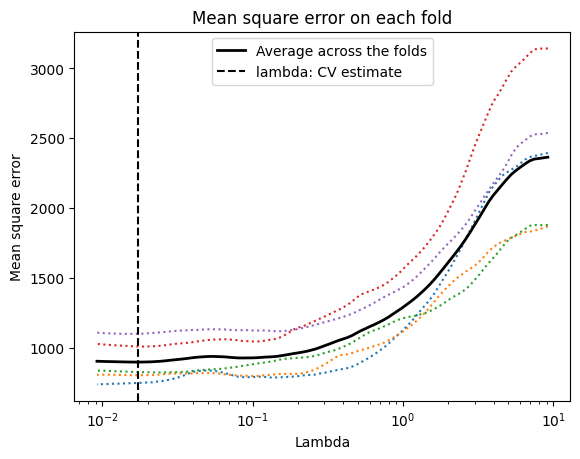

In [22]:
plt.semilogx(lassoProstate.alphas_, lassoProstate.mse_path_, ":")

plt.plot(
    lassoProstate.alphas_ ,
    lassoProstate.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lassoProstate.alpha_, linestyle="--", color="k", label="lambda: CV estimate"
)

plt.legend()
plt.xlabel("Lambda")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight");

In [23]:
bestlam = lassoProstate.alpha_
print(bestlam)

0.01721835656167621


In [24]:
l_coef = pd.DataFrame(allPredictors_lm.params, columns=["Lm"])
l_coef["Lasso"]= np.append(lassoProstate.intercept_, lassoProstate.coef_)
l_coef

,Lm,Lasso
const,0.724757,0.778731
X0,2.020367,1.490463
X1,1.192601,1.825329
X2,0.170295,-0.265821
X3,1.491600,0.410544
...,...,...
X485,1.966367,2.361616
X486,2.682373,2.758394
X487,0.048472,-0.000000
X488,1.292645,0.355333


In [28]:
prostateData_PCA = PCA()
prostateData_PCA.fit(X)
prostateData_PCA_summary = pd.DataFrame({'Standard deviation': np.sqrt(prostateData_PCA.explained_variance_),
                               'Proportion of Variance': prostateData_PCA.explained_variance_ratio_,
                               'Cumulative Proportion': np.cumsum(prostateData_PCA.explained_variance_ratio_)},
                               columns=['Standard deviation','Proportion of Variance','Cumulative Proportion'],
                               index=[ "Comp.%i" %(i+1) for i in range(prostateData_PCA.n_components_)])
print('PCA summary:')
prostateData_PCA_summary.T

PCA summary:


,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,...,Comp.481,Comp.482,Comp.483,Comp.484,Comp.485,Comp.486,Comp.487,Comp.488,Comp.489,Comp.490
Standard deviation,1.975316,1.965115,1.946877,1.929375,1.911898,1.902076,1.894653,1.874935,1.867205,1.863197,...,0.043120,0.038514,0.035595,0.031168,0.029597,0.026570,0.022745,1.919556e-02,1.749870e-02,1.320357e-02
Proportion of Variance,0.007963,0.007881,0.007735,0.007597,0.007460,0.007383,0.007326,0.007174,0.007115,0.007085,...,0.000004,0.000003,0.000003,0.000002,0.000002,0.000001,0.000001,7.519784e-07,6.249069e-07,3.557842e-07
Cumulative Proportion,0.007963,0.015844,0.023579,0.031176,0.038636,0.046020,0.053346,0.060520,0.067635,0.074720,...,0.999986,0.999989,0.999992,0.999994,0.999996,0.999997,0.999998,9.999990e-01,9.999996e-01,1.000000e+00


In [29]:
nFactors = 490
factorLoadings = pd.DataFrame(prostateData_PCA.components_[:nFactors, :],
                              columns= X.columns,
                              index=[ "Comp.%i" %(i+1) for i in range(nFactors)])
factors_train  = pd.DataFrame(prostateData_PCA.transform(X)[:, :nFactors],
                              columns =["Comp.%i" %(i+1) for i in range(nFactors)],
                              index=X.index)
zeroLoading = prostateData_PCA.mean_

In [30]:
def rel_imp_me(X, y): 
    names = X.columns
    ser = pd.Series(index = names, dtype='float64')
    lm0 = sm.OLS(y, sm.add_constant(X)).fit()
    for c in names:
        lm = sm.OLS(y, sm.add_constant(X[names.drop(c)])).fit()
        ser[c] = lm0.rsquared - lm.rsquared 
    res = pd.DataFrame(columns =['last', 'first', 'betasq', 'pratt'], index=names)
    res['last'] = ser
    corr = X.apply(lambda x: np.corrcoef(y,x)[0,1], axis=0)
    res['first'] = corr**2
    sx = X.apply(np.std, axis=0)
    res['betasq'] = (lm0.params[names] * sx / np.std(y))**2
    res['pratt'] = (lm0.params[names] * sx / np.std(y)) * corr
    return res


metrics_PCA = rel_imp_me(factors_train, Y)
print('Relative importance measures:')
metrics_PCA

Relative importance measures:


,last,first,betasq,pratt
Comp.1,3.633424e-03,3.633424e-03,3.633424e-03,3.633424e-03
Comp.2,1.974893e-06,1.974893e-06,1.974893e-06,1.974893e-06
Comp.3,6.886678e-04,6.886678e-04,6.886678e-04,6.886678e-04
Comp.4,1.647516e-02,1.647516e-02,1.647516e-02,1.647516e-02
Comp.5,5.776514e-03,5.776514e-03,5.776514e-03,5.776514e-03
...,...,...,...,...
Comp.486,2.205153e-06,2.205153e-06,2.205153e-06,2.205153e-06
Comp.487,5.593163e-07,5.593163e-07,5.593163e-07,5.593163e-07
Comp.488,4.722469e-07,4.722469e-07,4.722469e-07,4.722469e-07
Comp.489,1.453884e-06,1.453884e-06,1.453884e-06,1.453884e-06


In [31]:
first_PCA_rank = metrics_PCA['first'].rank(ascending=False)
metrics_PCA_sort = pd.DataFrame({"Predictors": first_PCA_rank.index,
                                 "Rank": first_PCA_rank.values}).sort_values(by="Rank") 
orderedFactors_train = pd.DataFrame(factors_train, columns=metrics_PCA_sort["Predictors"])
orderedLoadings = pd.DataFrame(factorLoadings.T, columns=metrics_PCA_sort["Predictors"])
print('Ordered factors for train data (head):')
orderedFactors_train.head()

Ordered factors for train data (head):


Predictors,Comp.45,Comp.43,Comp.36,Comp.34,Comp.14,Comp.20,Comp.21,Comp.83,Comp.101,Comp.73,...,Comp.485,Comp.437,Comp.477,Comp.490,Comp.465,Comp.347,Comp.408,Comp.474,Comp.466,Comp.218
0,-2.265515,-2.739348,1.684457,-4.643410,0.287058,-0.049009,-3.270238,0.022071,1.066998,-0.025650,...,0.018472,0.230828,-0.021384,-0.008229,0.077908,0.635790,0.595349,0.010774,0.099083,-0.417298
1,-1.993827,0.595825,0.421408,-1.780898,2.109976,1.633000,2.803393,1.019945,-0.048691,4.086639,...,0.016201,-0.043090,-0.055892,0.024780,-0.095145,-0.482268,-0.382553,0.007541,0.134755,-1.681904
2,-2.745135,-0.477957,1.770215,0.616062,-3.876034,2.111899,-0.272488,-3.095649,-1.934697,-2.258544,...,0.026153,0.038353,-0.029022,0.020123,-0.158554,-0.900051,0.278155,0.020093,0.107226,0.670791
3,1.115403,-0.601953,-0.311629,0.583149,-2.947994,-0.760487,2.066474,1.413725,3.074836,0.249784,...,0.040235,0.216026,-0.089088,0.002889,0.000112,0.084899,0.163177,-0.138723,-0.027265,-0.058862
4,-1.141699,1.242214,-2.297115,-0.121695,-3.423470,-0.367130,-2.007211,2.241906,2.376683,-0.693577,...,0.008444,0.135064,-0.110611,-0.003171,0.086085,-0.017689,0.235168,0.130485,0.205018,0.879691


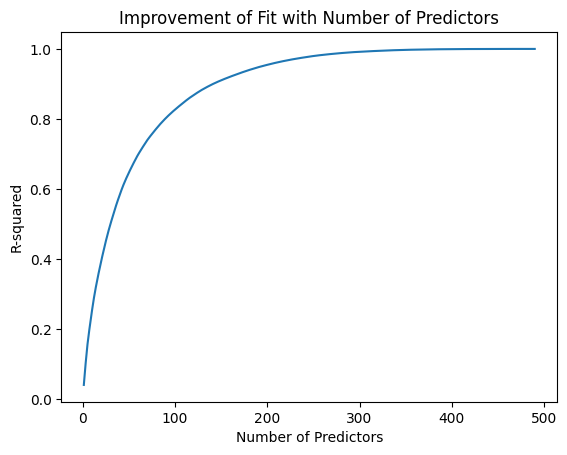

In [33]:
orderedPCA_R2 = [sm.OLS(Y, sm.add_constant(orderedFactors_train.iloc[:,:j])).fit().rsquared \
                 for j in range(1, nFactors+1)]
plt.plot(range(1, nFactors+1),orderedPCA_R2)

plt.title("Improvement of Fit with Number of Predictors")
plt.ylabel("R-squared")
plt.xlabel("Number of Predictors");

In [35]:
m5_PCA = sm.OLS(Y, sm.add_constant(orderedFactors_train.iloc[:,:5])).fit()
coefficients_PCA = m5_PCA.params
restoredSlopes = np.dot(orderedLoadings.iloc[:,:5], coefficients_PCA[1:6])

In [37]:
coefficientsComparison = pd.DataFrame({'Lasso': lassoProstate.coef_, 
                                       'Lm' : allPredictors_lm.params[1:9],
                                       'PCR' : restoredSlopes}, 
                                      index=X.columns)
print('Slopes estimates for different models:')
coefficientsComparison

Slopes estimates for different models:


,Lasso,Lm,PCR
X0,1.490463,2.020367,-0.019256
X1,1.825329,1.192601,-0.017168
X2,-0.265821,0.170295,0.597251
X3,0.410544,1.491600,0.452863
X4,3.546323,3.513596,-0.087195
...,...,...,...
X485,2.361616,NaN,-0.121428
X486,2.758394,NaN,0.090331
X487,-0.000000,NaN,-0.600475
X488,0.355333,NaN,0.696266


In [39]:
out = Lasso(alpha=bestlam)
out.fit(X,Y)


Lasso(alpha=0.01721835656167621)

In [ ]:
lasso_coef = out.coef_
